# Exercise 2.3 – Fundamentals of Visualization Libraries (Part 1)

**Author:** Brahim Boukaskas  
**Program:** CareerFoundry – Data Analytics  
**Project:** New York CitiBike 2022  

### Objective
The goal of this exercise was to explore Matplotlib’s core functionality and practice creating basic visualizations to better understand how temperature affects CitiBike ridership.  
This exercise emphasized the difference between procedural and object-oriented plotting approaches.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv("../temp_storage/data_raw/citibike_weather_2022.csv")

print("Shape:", df.shape)
df.head()


Shape: (895485, 17)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,date,avgTemp,_merge
0,919C40A703A965D7,electric_bike,2022-04-15 15:02:20,2022-04-15 15:57:16,Pershing Field,JC024,Pershing Field,JC024,40.74,-74.05,40.74,-74.05,casual,NaN,2022-04-15,12.6,both
1,3B40831921DAD6C1,classic_bike,2022-04-08 10:20:55,2022-04-08 10:25:29,JC Medical Center,JC011,Grand St,JC102,40.72,-74.05,40.72,-74.04,member,NaN,2022-04-08,11.4,both
2,69C5C0766309F73D,electric_bike,2022-04-09 14:14:04,2022-04-09 14:18:51,Mama Johnson Field - 4 St & Jackson St,HB404,Southwest Park - Jackson St & Observer Hwy,HB401,40.74,-74.04,40.74,-74.04,member,NaN,2022-04-09,10.5,both
3,304B82055A1D4A24,classic_bike,2022-04-05 19:43:37,2022-04-05 19:51:14,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Marshall St & 2 St,HB408,40.74,-74.03,40.74,-74.04,casual,NaN,2022-04-05,10.1,both
4,1CB760ECBCB08609,classic_bike,2022-04-17 11:25:26,2022-04-17 11:29:45,Mama Johnson Field - 4 St & Jackson St,HB404,Mama Johnson Field - 4 St & Jackson St,HB404,40.74,-74.04,40.74,-74.04,member,NaN,2022-04-17,7.8,both


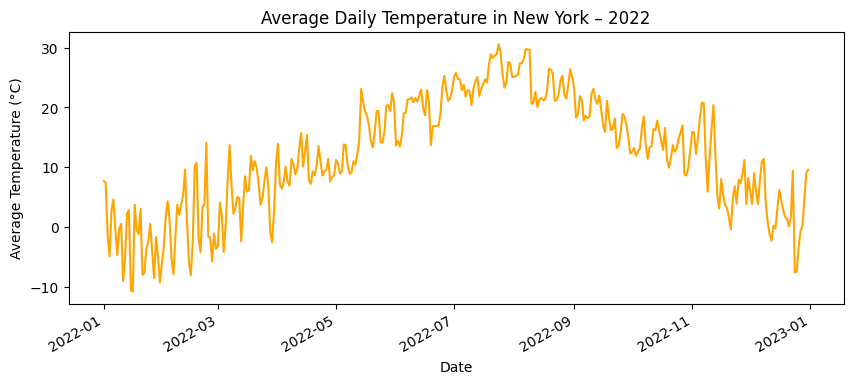

In [ ]:
# Converting the date column to datetime and sort by date
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").set_index("date")

# Ploting the daily average temperature
df["avgTemp"].plot(
    figsize=(10, 4),
    title="Average Daily Temperature in New York – 2022",
    color="orange"
)

plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.show()


In [ ]:
# Grouping by date and count the number of rides per day
df_rides = (
    df.groupby("date")["ride_id"]
    .count()
    .reset_index()
    .rename(columns={"ride_id": "bike_rides_daily"})
)

# Quick check
df_rides.head()


,date,bike_rides_daily
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [ ]:
# Getting the temperature values (reset the index first)
df_temp = df.reset_index()[["date", "avgTemp"]]

# Merging both DataFrames by date
df_merged = pd.merge(df_rides, df_temp, on="date", how="left")

print("Shape:", df_merged.shape)
df_merged.head()


Shape: (895485, 3)


,date,bike_rides_daily,avgTemp
0,2022-01-01,592,7.7
1,2022-01-01,592,7.7
2,2022-01-01,592,7.7
3,2022-01-01,592,7.7
4,2022-01-01,592,7.7


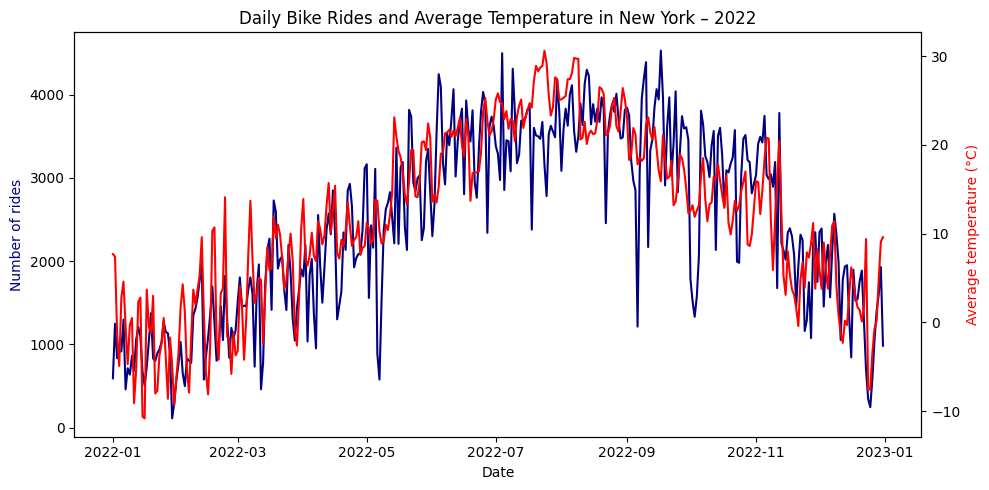

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

# First y-axis: number of rides
ax.plot(df_merged["date"], df_merged["bike_rides_daily"], color="navy", label="Daily bike rides")
ax.set_xlabel("Date")
ax.set_ylabel("Number of rides", color="navy")

# Second y-axis: temperature
ax2 = ax.twinx()
ax2.plot(df_merged["date"], df_merged["avgTemp"], color="red", label="Average temperature (°C)")
ax2.set_ylabel("Average temperature (°C)", color="red")

plt.title("Daily Bike Rides and Average Temperature in New York – 2022")

# Improving layout
fig.tight_layout()
plt.show()


In this step I used the object-oriented (OO) interface of Matplotlib to plot two related variables with different scales. The first y-axis shows the daily number of CitiBike rides, while the second y-axis shows the corresponding average temperature. The OO method provides more flexibility and control compared to the simple procedural plotting style used earlier.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../temp_storage/data_raw/citibike_weather_2022.csv")

print("Shape:", df.shape)
df.head()


Shape: (895485, 17)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,date,avgTemp,_merge
0,919C40A703A965D7,electric_bike,2022-04-15 15:02:20,2022-04-15 15:57:16,Pershing Field,JC024,Pershing Field,JC024,40.742677,-74.051789,40.742677,-74.051789,casual,NaN,2022-04-15,12.6,both
1,3B40831921DAD6C1,classic_bike,2022-04-08 10:20:55,2022-04-08 10:25:29,JC Medical Center,JC011,Grand St,JC102,40.716540,-74.049638,40.715178,-74.037683,member,NaN,2022-04-08,11.4,both
2,69C5C0766309F73D,electric_bike,2022-04-09 14:14:04,2022-04-09 14:18:51,Mama Johnson Field - 4 St & Jackson St,HB404,Southwest Park - Jackson St & Observer Hwy,HB401,40.743140,-74.040041,40.737551,-74.041664,member,NaN,2022-04-09,10.5,both
3,304B82055A1D4A24,classic_bike,2022-04-05 19:43:37,2022-04-05 19:51:14,Hoboken Terminal - Hudson St & Hudson Pl,HB101,Marshall St & 2 St,HB408,40.735938,-74.030305,40.740802,-74.042521,casual,NaN,2022-04-05,10.1,both
4,1CB760ECBCB08609,classic_bike,2022-04-17 11:25:26,2022-04-17 11:29:45,Mama Johnson Field - 4 St & Jackson St,HB404,Mama Johnson Field - 4 St & Jackson St,HB404,40.743140,-74.040041,40.743140,-74.040041,member,NaN,2022-04-17,7.8,both


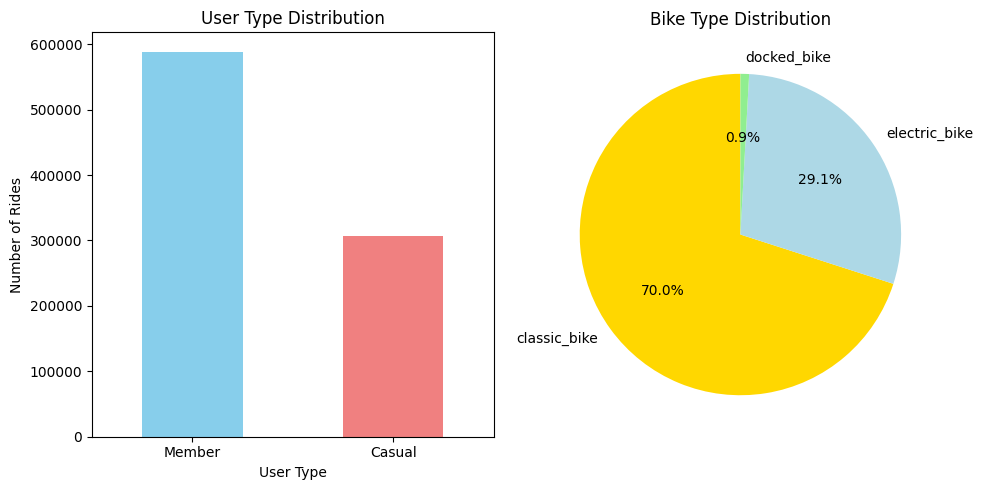

In [7]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Bar chart: member vs casual
df["member_casual"].value_counts().plot(
    kind="bar", 
    ax=ax1, 
    color=["skyblue", "lightcoral"]
)
ax1.set_title("User Type Distribution")
ax1.set_xlabel("User Type")
ax1.set_ylabel("Number of Rides")
ax1.set_xticklabels(["Member", "Casual"], rotation=0)

# Pie chart: rideable type
df["rideable_type"].value_counts().plot(
    kind="pie", 
    ax=ax2, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=["gold", "lightblue", "lightgreen"]
)
ax2.set_title("Bike Type Distribution")
ax2.set_ylabel("")  # remove default ylabel

plt.tight_layout()
plt.show()


In this final section, I used Matplotlib’s object-oriented (OO) interface to create a figure with two separate subplots.
The first axis displays a bar chart showing the distribution of CitiBike users (members vs casual riders), while the second axis shows a pie chart representing the proportion of bike types used throughout 2022.
Using the OO approach allows full control over individual axes and layouts within the same figure, making it more flexible than the procedural .plot() method.

### Summary and Insights

In this exercise, I created the first visualizations for the CitiBike and weather dataset using Matplotlib.  
I produced a time-series line chart to show average daily temperatures and a dual-axis chart to compare daily bike rides with temperature variation.  
I also explored Matplotlib’s two main paradigms — the procedural style using `plt` and the object-oriented style using figure and axis objects.  

Finally, I added a bonus task with a histogram of trip durations and a two-axis figure combining a bar chart of user types and a pie chart of bike types.  
These steps helped me understand how to structure visual analysis using Matplotlib and prepare for more advanced Seaborn visualizations in the next task.
